# Monaco Q Analysis

**Description:**  
This notebook performs an exploratory data analysis of the Q session for the 2025 Monaco Grand Prix using the FastF1 library.  
It begins by loading telemetry and lap data, followed by extracting relevant driver and compound information.  
Custom utility functions are defined for processing time deltas, and visualizations are prepared using libraries like Matplotlib and Seaborn.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
import matplotlib.pyplot as plt
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Monaco Grand Prix', 'Q')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()

weather = session.weather_data



req         WARNING 	DEFAULT CACHE ENABLED! (5.88 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '44', '1', '6', '14', '31', '30', '23', '55', '22', '27', '63', '12', '5', '87', '10', '18', '43']


In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:21:31.849000,NOR,4,0 days 00:01:12.860000,2.0,1.0,NaT,NaT,0 days 00:00:19.256000,0 days 00:00:34.544000,...,True,McLaren,0 days 00:20:18.989000,2025-05-24 14:05:20.110,1,NaN,False,,False,True
2,0 days 00:23:11.019000,NOR,4,0 days 00:01:39.170000,3.0,1.0,NaT,NaT,0 days 00:00:25.163000,0 days 00:00:47.396000,...,True,McLaren,0 days 00:21:31.849000,2025-05-24 14:06:32.970,1,NaN,False,,False,True
3,0 days 00:24:22.615000,NOR,4,0 days 00:01:11.596000,4.0,1.0,NaT,NaT,0 days 00:00:18.806000,0 days 00:00:33.840000,...,True,McLaren,0 days 00:23:11.019000,2025-05-24 14:08:12.140,1,NaN,False,,False,True
4,0 days 00:25:56.516000,NOR,4,0 days 00:01:33.901000,5.0,1.0,NaT,NaT,0 days 00:00:25.155000,0 days 00:00:46.054000,...,True,McLaren,0 days 00:24:22.615000,2025-05-24 14:09:23.736,1,NaN,False,,False,True
5,0 days 00:27:08.255000,NOR,4,0 days 00:01:11.739000,6.0,1.0,NaT,NaT,0 days 00:00:18.803000,0 days 00:00:33.794000,...,True,McLaren,0 days 00:25:56.516000,2025-05-24 14:10:57.637,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0 days 00:22:56.812000,COL,43,0 days 00:01:35.922000,5.0,1.0,NaT,NaT,0 days 00:00:24.966000,0 days 00:00:46.374000,...,True,Alpine,0 days 00:21:20.890000,2025-05-24 14:06:22.011,1,NaN,False,,False,True
426,0 days 00:24:09.536000,COL,43,0 days 00:01:12.724000,6.0,1.0,NaT,NaT,0 days 00:00:19.016000,0 days 00:00:34.429000,...,True,Alpine,0 days 00:22:56.812000,2025-05-24 14:07:57.933,1,NaN,False,,False,True
429,0 days 00:30:05.370000,COL,43,0 days 00:01:12.815000,9.0,2.0,NaT,NaT,0 days 00:00:18.824000,0 days 00:00:34.803000,...,True,Alpine,0 days 00:28:52.555000,2025-05-24 14:13:53.676,1,NaN,False,,False,True
430,0 days 00:31:41.736000,COL,43,0 days 00:01:36.366000,10.0,2.0,NaT,NaT,0 days 00:00:26.370000,0 days 00:00:44.941000,...,True,Alpine,0 days 00:30:05.370000,2025-05-24 14:15:06.491,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:249: FutureWarning: INCOMPATIBLE with 2025 season!The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("INCOMPATIBLE with 2025 season!The function `team_color` "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [7]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [8]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

In [9]:
# Replace these with your actual telemetry-framework imports:
# from telemetry import transformed_laps, circuit_info, interpolate_dataframe, session

import warnings

# ignore only the FastF1 deprecation warning about delta_time
warnings.filterwarnings(
    "ignore",
    message="`utils.delta_time` is considered deprecated.*",
    category=FutureWarning
)

class FastestLap:
    """
    Wraps a fastest-lap record and provides convenience accessors.
    Expects lap to have ['Driver','Sector1Time','Sector2Time'] and get_car_data().
    """
    def __init__(self, lap):
        self.name = lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2

def compute_acceleration(df):
    """
    Add longitudinal acceleration to telemetry DataFrame.
    Expects:
      - df['Speed'] in km/h
      - df['SessionTime'] as pandas Timedelta
    Returns df copy with new columns:
      - 'Speed_ms': speed in m/s
      - 'Sess_s'  : session time in seconds
      - 'Acc'     : longitudinal acceleration in m/s²
    """
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6
    df['Sess_s']   = df['SessionTime'].dt.total_seconds()
    df['Acc']      = np.gradient(df['Speed_ms'], df['Sess_s'])
    return df

def compare_laps(drivers, channels=None, session_label="", driver_color_map=None):
    """
    Compare up to three drivers' fastest laps in a Jupyter notebook, including acceleration and delta-time.
    :param drivers: list of 1-3 driver codes, e.g. ['LEC', 'NOR', 'VER']
    :param channels: list of telemetry columns to plot
    :param session_label: optional session indicator (e.g. 'FP1')
    :param driver_color_map: dict mapping driver codes to matplotlib-compatible colors
    """
    if not (1 <= len(drivers) <= 3):
        raise ValueError("drivers list must contain 1 to 3 items")

    # Default channels
    default_channels = ['Speed', 'Throttle', 'Brake', 'RPM', 'nGear']
    channels = channels or default_channels

    units = {
        'Speed': 'km/h', 'Throttle': '%', 'Brake': '%', 'RPM': 'rpm',
        'nGear': '', 'DRS': ''
    }

    # Load fastest laps and compute acceleration
    laps = []          # FastestLap wrappers
    lap_objs = []      # raw FastF1 Lap objects
    for d in drivers:
        lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
        fl = FastestLap(lap_obj)
        fl.df = compute_acceleration(fl.df)
        laps.append(fl)
        lap_objs.append(lap_obj)
    
    avg_air_temp = round(weather['AirTemp'].mean())
    avg_track_temp = round(weather['TrackTemp'].mean())    

    # Compute total lap times
    lap_times = [
    lap_obj['LapTime'].total_seconds()
    for lap_obj in lap_objs
    ]
    # Benchmark = fastest lap
    baseline_idx = lap_times.index(min(lap_times))
    baseline_name = drivers[baseline_idx]

    # Sector split distances and corner markers
    s1_dist, s2_dist = laps[baseline_idx].sector_distances
    corner_distances = circuit_info.corners['Distance'].values

    # Color palette
    default_palette = ['red', 'orange', 'blue']
    palette = []
    for i, d in enumerate(drivers):
        if driver_color_map and d in driver_color_map:
            palette.append(driver_color_map[d])
        else:
            palette.append(default_palette[i])

    # Determine subplots: channels + Acc + (Δ-time if >1 driver)
    n_plots = len(channels) + 1 + (1 if len(drivers) > 1 else 0)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 3.5 * n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]
    plt.style.use('dark_background')

    # Plot telemetry channels
    for i, ch in enumerate(channels):
        ax = axes[i]
        if ch not in laps[baseline_idx].df.columns:
            ax.set_visible(False)
            continue
        for lap, col in zip(laps, palette):
            ax.plot(lap.df['Distance'], lap.df[ch], color=col,
                    linestyle='-', label=f"{lap.name} {ch}")
        ax.set_ylabel(f"{ch} ({units[ch]})", color='white')
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(colors='white')
        ax.axvline(s1_dist, color='white', linestyle='--')
        ax.axvline(s2_dist, color='white', linestyle='--')
        for num, d in enumerate(corner_distances, start=1):
            ax.text(d, ax.get_ylim()[0], str(num), color='white', fontsize=8,
                    ha='center', va='bottom')

    # Plot acceleration
    ax_acc = axes[len(channels)]
    for lap, col in zip(laps, palette):
        ax_acc.plot(lap.df['Distance'], lap.df['Acc'], color=col,
                    linestyle='-', label=f"{lap.name} Acc")
    ax_acc.set_ylabel('Acc (m/s²)', color='white')
    ax_acc.legend(loc='upper right')
    ax_acc.grid(True, linestyle='--', linewidth=0.5)
    ax_acc.tick_params(colors='white')

    # Plot Δ-time using FastF1 utility
    if len(drivers) > 1:
        ax_dt = axes[-1]
        ref_lap = lap_objs[baseline_idx]
        # For each comparison lap
        for idx, comp_lap in enumerate(lap_objs):
            if idx == baseline_idx:
                continue
            # delta_time returns (Series, ref_tel_df, comp_tel_df)
            delta_series, ref_tel, comp_tel = delta_time(ref_lap, comp_lap)
            ax_dt.plot(ref_tel['Distance'], delta_series,
                       color=palette[idx], linestyle='-',
                       label=f"Δ ({drivers[idx]} - {baseline_name})")
        ax_dt.set_ylabel('Δ Time (s)', color='white')
        ax_dt.axhline(0, color='white', linestyle='--')
        ax_dt.grid(True, linestyle='--', linewidth=0.5)
        ax_dt.tick_params(colors='white')
        ax_dt.set_xlabel('Distance (m)', color='white')
        ax_dt.xaxis.set_major_locator(plt.MultipleLocator(500))
        ax_dt.xaxis.set_minor_locator(plt.MultipleLocator(100))
        ax_dt.legend(loc='upper right', title=f"Benchmark: {baseline_name}")

    # Annotate lap times
    labels = []
    for i, (name, secs) in enumerate(zip(drivers, lap_times)):
        mins = int(secs // 60)
        rem = secs - mins * 60
        label = f"{name}: {mins}:{rem:06.3f}"
        if i == 0:  # Show weather next to first driver
            label += f"   AIR: {avg_air_temp:.1f}°C  TRACK: {avg_track_temp:.1f}°C"
        labels.append(label)
    
    fig.text(0.02, 0.98, "\n".join(labels), ha='left', va='top',
             color='white', fontsize=10,
             bbox=dict(facecolor='black', alpha=0.5, pad=4))

    # Signature and title
    fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=15)
    title = (f"{session.event['EventName']} {session.event.year} {session_label}" 
             if session_label else f"{session.event['EventName']} {session.event.year}")
    fig.suptitle(title, color='white')
    fig.subplots_adjust(top=0.92)
    plt.tight_layout(rect=[0, 0, 0.90, 0.97])
    plt.show()

### 🛰️ Telemetry Analysis

This section visualizes telemetry data from the Q session. The plots help compare driving styles, speeds, braking points, and throttle application across different drivers.  
Telemetry is essential for identifying performance differences at specific parts of the circuit, such as corner entries and exits.

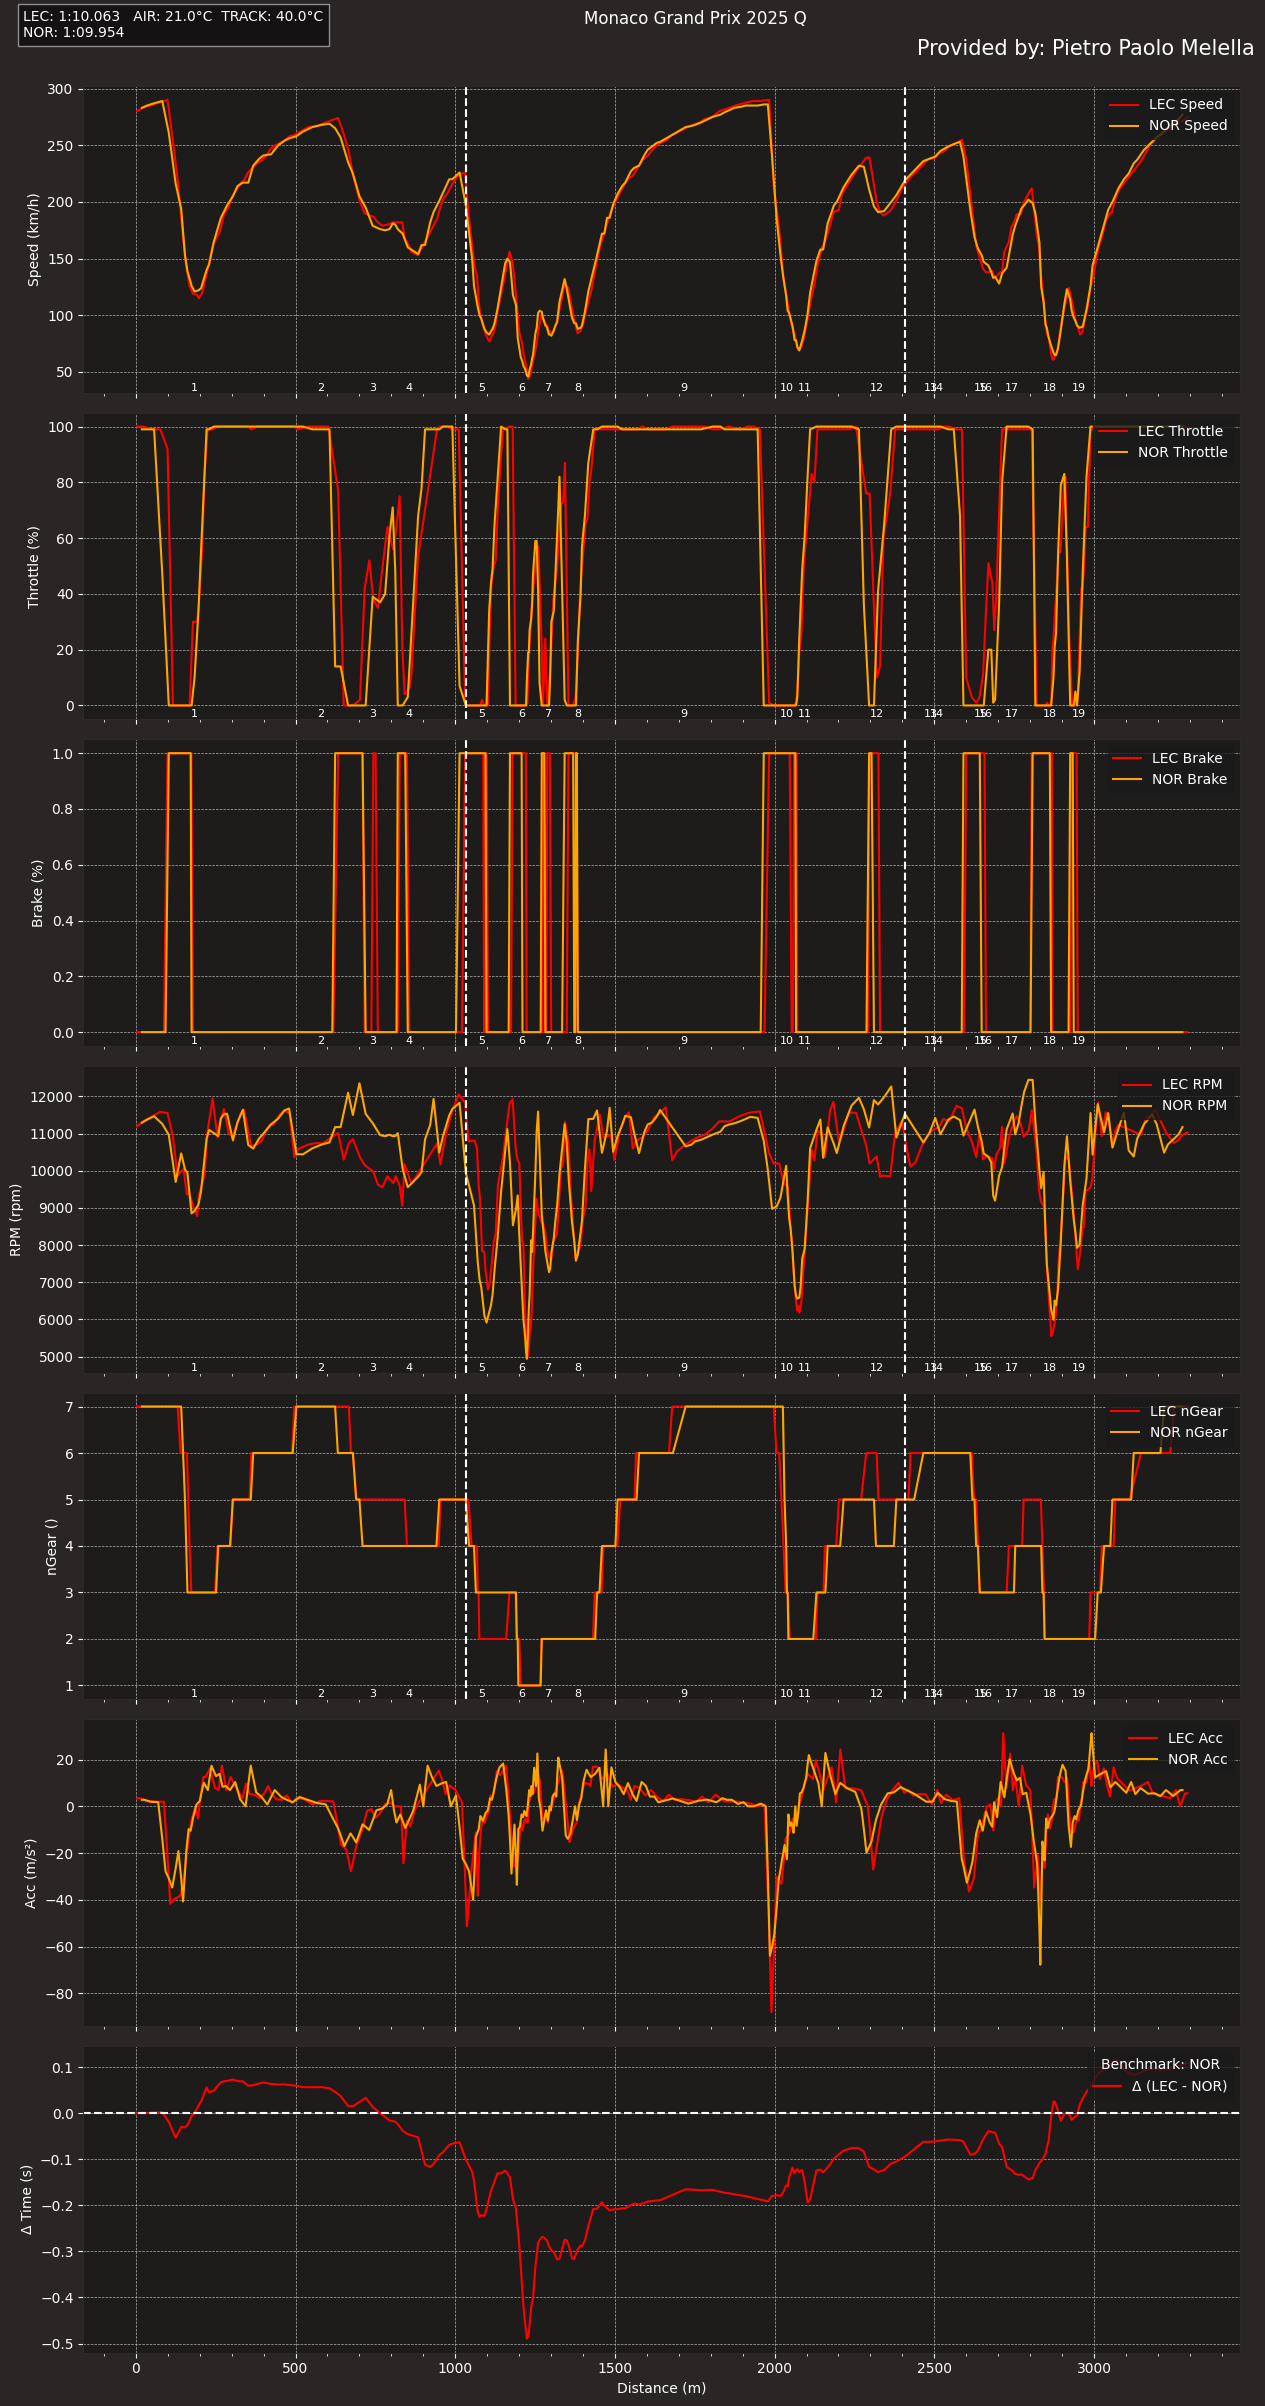

In [10]:
compare_laps(['LEC', 'NOR'], session_label='Q')

In [11]:
class CornerAnalysis:
    """
    Analyze telemetry for one or more corners (or a corner range).

    Parameters:
      - drivers: list of 1–4 driver codes (e.g. ['LEC','NOR','VER','HAM'])
      - corner_idxs: int, or iterable of ints (1-based corner numbers)
      - before: meters before the first corner apex to include
      - after:  meters after the last corner apex to include
      - session_label: string to include in plot title (e.g. 'FP1')

    Example:
      ca = CornerAnalysis(['LEC','NOR'],
                          corner_idxs=[4,5,6],
                          before=50,
                          after=50,
                          session_label='FP1')
      ca.plot_all()
    """
    def __init__(self, drivers, corner_idxs, before=50, after=50, session_label=''):
        if not (1 <= len(drivers) <= 4):
            raise ValueError("drivers list must contain between 1 and 4 items")
        self.drivers = drivers
        self.before = before
        self.after = after
        self.session_label = session_label

        # Normalize user-provided corner_idxs (1-based) to zero-based list
        if isinstance(corner_idxs, int):
            self.corner_list = [corner_idxs - 1]
        elif hasattr(corner_idxs, '__iter__'):
            # allow lists/tuples of arbitrary length
            try:
                ints = [int(x) for x in corner_idxs]
            except Exception:
                raise ValueError("corner_idxs iterable must contain integers")
            if any(i < 1 for i in ints):
                raise ValueError("corner_idxs must be 1-based positive integers")
            self.corner_list = [i - 1 for i in ints]
        else:
            raise ValueError("corner_idxs must be an int or iterable of ints (1-based)")

        self.start_idx = min(self.corner_list)
        self.end_idx   = max(self.corner_list)

        self.telemetry = {}
        self._load_data()

        # Define a simple color palette for up to 4 drivers
        self.palette = ['red', 'orange', 'blue', 'green'][:len(self.drivers)]

    def _load_data(self):
        """Load and interpolate fastest-lap telemetry for each driver."""
        for d in self.drivers:
            lap = transformed_laps.pick_drivers(d).pick_fastest()
            df = lap.get_car_data().add_distance()
            df = interpolate_dataframe(df)
            self.telemetry[d] = df

    def get_corner_df(self, driver):
        """
        Returns a DataFrame slice for the specified corner(s), with computed Acc.
        """
        df = self.telemetry[driver]
        corners = circuit_info.corners['Distance'].values
        start_dist = corners[self.start_idx] - self.before
        end_dist   = corners[self.end_idx]   + self.after
        dfc = df[(df['Distance'] >= start_dist) & (df['Distance'] <= end_dist)].copy()
        # compute acceleration
        dfc['Speed_ms'] = dfc['Speed'] / 3.6
        dfc['Sess_s']   = dfc['SessionTime'].dt.total_seconds()
        dfc['Acc']      = np.gradient(dfc['Speed_ms'], dfc['Sess_s'])
        return dfc

    def plot_all(self):
        """Plot Speed, Acc, Throttle, Brake for each driver over the corner region."""
        channels = ['Speed', 'Acc', 'Throttle', 'Brake']
        n = len(channels)
        fig, axs = plt.subplots(n, 1, figsize=(10, 3 * n), sharex=True)
        plt.style.use('dark_background')

        # Build title string
        event = session.event['EventName']
        year  = session.event.year

        # label corners
        if len(self.corner_list) == 1:
            corner_label = f"Corner {self.corner_list[0] + 1}"
        else:
            # if they form a continuous run, show 4–6; otherwise comma‐separate
            sorted_idxs = sorted(self.corner_list)
            runs = (sorted_idxs[i] + 1 == sorted_idxs[i+1] for i in range(len(sorted_idxs)-1))
            if all(runs):
                corner_label = f"Corners {sorted_idxs[0]+1}-{sorted_idxs[-1]+1}"
            else:
                corner_label = "Corners " + ",".join(str(i+1) for i in sorted_idxs)

        title = f"{event} {year} {self.session_label} {corner_label}"
        fig.suptitle(title, color='white')
        fig.subplots_adjust(top=0.90)

        # Plot each channel
        for idx, ch in enumerate(channels):
            ax = axs[idx]
            for d, col in zip(self.drivers, self.palette):
                dfc = self.get_corner_df(d)
                ax.plot(dfc['Distance'], dfc[ch], color=col, label=f"{d} {ch}")
            ax.set_ylabel(ch, color='white')
            ax.legend(loc='upper right')
            ax.grid(True, linestyle='--', linewidth=0.5)
            ax.tick_params(colors='white')
            if idx == n - 1:
                ax.set_xlabel('Distance (m)', color='white')
            # mark each apex
            corners = circuit_info.corners['Distance'].values
            for apex_idx in self.corner_list:
                ax.axvline(corners[apex_idx], color='white', linestyle=':')

        # Annotate signature
        fig.text(
            0.95, 0.93,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

### 🔍 Sainte Dévote (Curva 1) Analysis

This analysis targets Turn 1 at Monaco: Sainte Dévote.  
It’s key for launch, grip on cold tires, and mechanical balance.  
Telemetry reveals differences in braking stability and early throttle application.

### 🔍 Grand Hotel Hairpin (Curva 6-7) Analysis

This section focuses on the tightest corner in Formula 1: the Grand Hotel Hairpin.  
It emphasizes steering angle, traction control, and minimum speed.  
Use this to compare each driver’s low-speed handling and throttle discipline.

### 🔍 Swimming Pool Section (Curves 13–16) Analysis

Here we evaluate the fast, technical Swimming Pool complex.  
High agility and precise placement are required through these quick changes of direction.  
The plot highlights minimum speeds and how confidently drivers commit to the line.

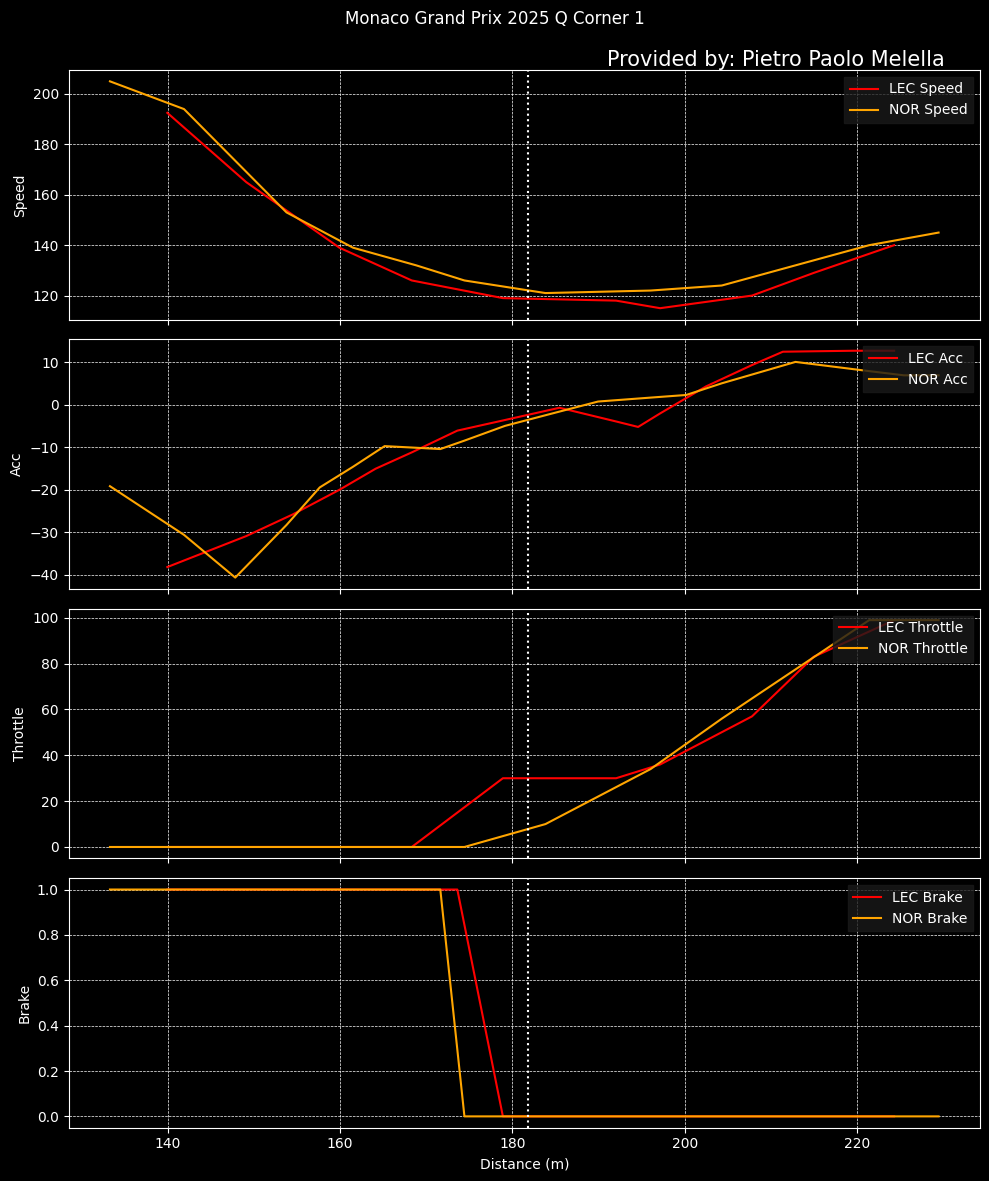

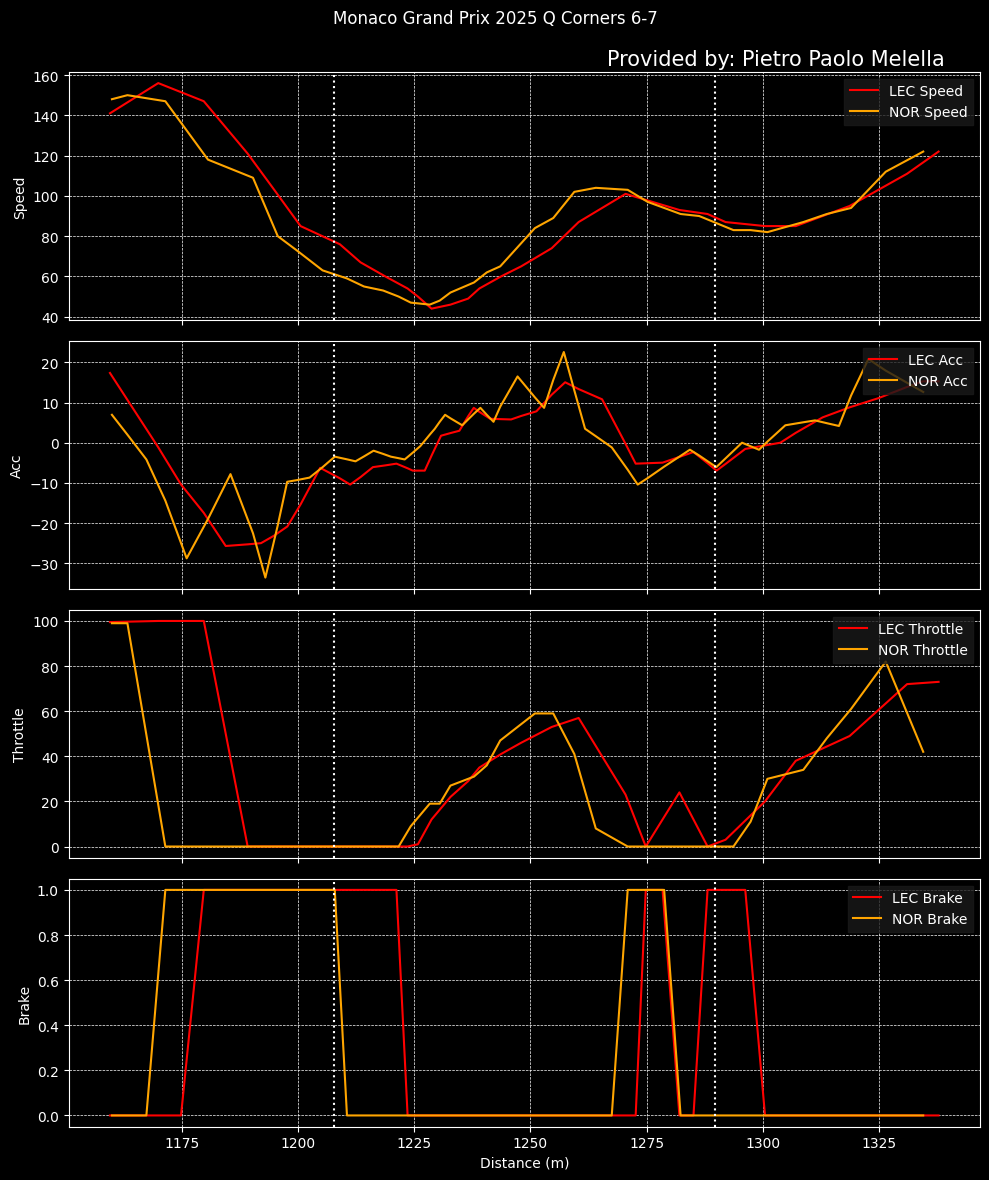

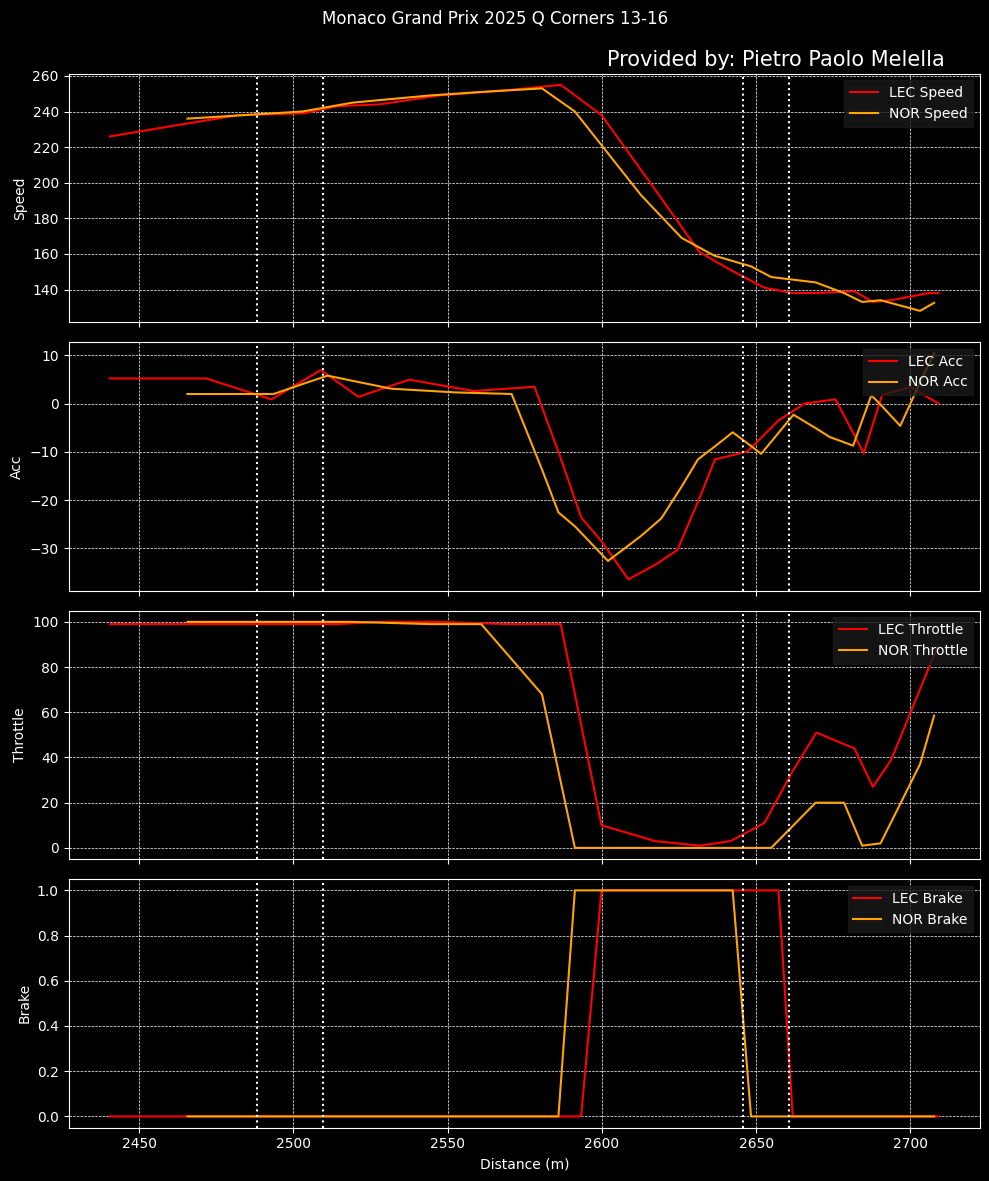

In [12]:
corners =[1,[6,7],[13,14,15,16]]
for corner in corners:
    ca = CornerAnalysis(
        ['LEC','NOR'],    # up to 4 drivers
        corner_idxs=corner,            # 1-based corners
        before=50,
        after=50,
        session_label='Q'
    )
    ca.plot_all()

In [13]:
class CornerSpeedComparator:
    def __init__(self, drivers, driver_color_map=None, n_interp=200, session_label=''):
        """
        :param drivers: list of driver codes, e.g. ['LEC','NOR','VER']
        :param driver_color_map: dict mapping driver codes to colors
        :param n_interp: number of points to interpolate in each corner
        """
        self.drivers = drivers
        self.driver_color_map = driver_color_map or {}
        self.n_interp = n_interp
        self._load_laps()
        self._compute_corner_windows()
        self._compute_peaks()
        self.session_label = session_label
        

    def _load_laps(self):
        self.lap_objs = []
        self.laps = []
        for d in self.drivers:
            lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
            fl = FastestLap(lap_obj)
            fl.df = compute_acceleration(fl.df)
            self.lap_objs.append(lap_obj)
            self.laps.append(fl)

    def _compute_corner_windows(self):
        apexes = sorted(circuit_info.corners['Distance'].values)
        self.entries = [0.0] + [(apexes[i-1] + apexes[i]) / 2 for i in range(1, len(apexes))]
        self.exits = [(apexes[i] + apexes[i+1]) / 2 for i in range(len(apexes)-1)] + [
            max(fl.df['Distance'].max() for fl in self.laps)
        ]
        self.apexes = apexes

    def _compute_peaks(self):
        peak_dict, delta_dict = {}, {}
        for idx, (start, apex, end) in enumerate(
                zip(self.entries, self.apexes, self.exits), start=1):
            grid = np.linspace(start, end, self.n_interp)
            interp_speeds = {
                fl.name: np.interp(grid, fl.df['Distance'], fl.df['Speed'])
                for fl in self.laps
            }
            peaks = {name: speeds.max() for name, speeds in interp_speeds.items()}
            winner = max(peaks, key=peaks.get)
            peak_dict[f" {idx}"] = peaks
        self.df_peaks = pd.DataFrame(peak_dict).T

    def plot_peak_speeds(self, figsize=(12,6)):
        """Grouped bar chart of peak speeds per corner with vertical annotations."""
        fig, ax = plt.subplots(figsize=figsize)
        self.df_peaks.plot.bar(
            ax=ax, rot=0,
            color=[self.driver_color_map.get(d) for d in self.df_peaks.columns]
        )
        
        # Build title string
        event = session.event['EventName']
        year  = session.event.year
        ax.set_xlabel("Turn")
        ax.set_ylabel("Peak Speed (km/h)")
        ax.set_title(f"Turn Peak Speeds {event} {year} {self.session_label}")
        ax.legend(
            title="Driver",
            loc='upper left',
            bbox_to_anchor=(1.02, 1),
            fontsize=8
        )

        # Annotate each corner as a vertical list
        for i, corner in enumerate(self.df_peaks.index):
            speeds = self.df_peaks.loc[corner]
            winner = speeds.idxmax()
            win_speed = speeds[winner]
            # Build three lines: winner, then others with delta
            lines = [f"{winner}: {win_speed:.0f}"]
            for d in self.drivers:
                if d == winner:
                    continue
                diff = int(speeds[d] - win_speed)
                lines.append(f"{d}: {diff:+d}")
            text = "\n".join(lines)
            ax.text(
                i, win_speed + 3,
                text,
                ha='center', va='bottom',
                color='white', fontsize=6
            )

        # Annotate signature
        fig.text(
            0.94, 1.6,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )

        plt.tight_layout(rect=[0, 0, 1.3, 1.8])
        plt.show()


### 🚀 Peak Speed per Corner

This plot shows the peak speed reached by each driver in every corner.  
It highlights which drivers are the fastest in straight-line sections versus technical turns.  
Use this to assess raw speed and confidence through specific sections of the track.

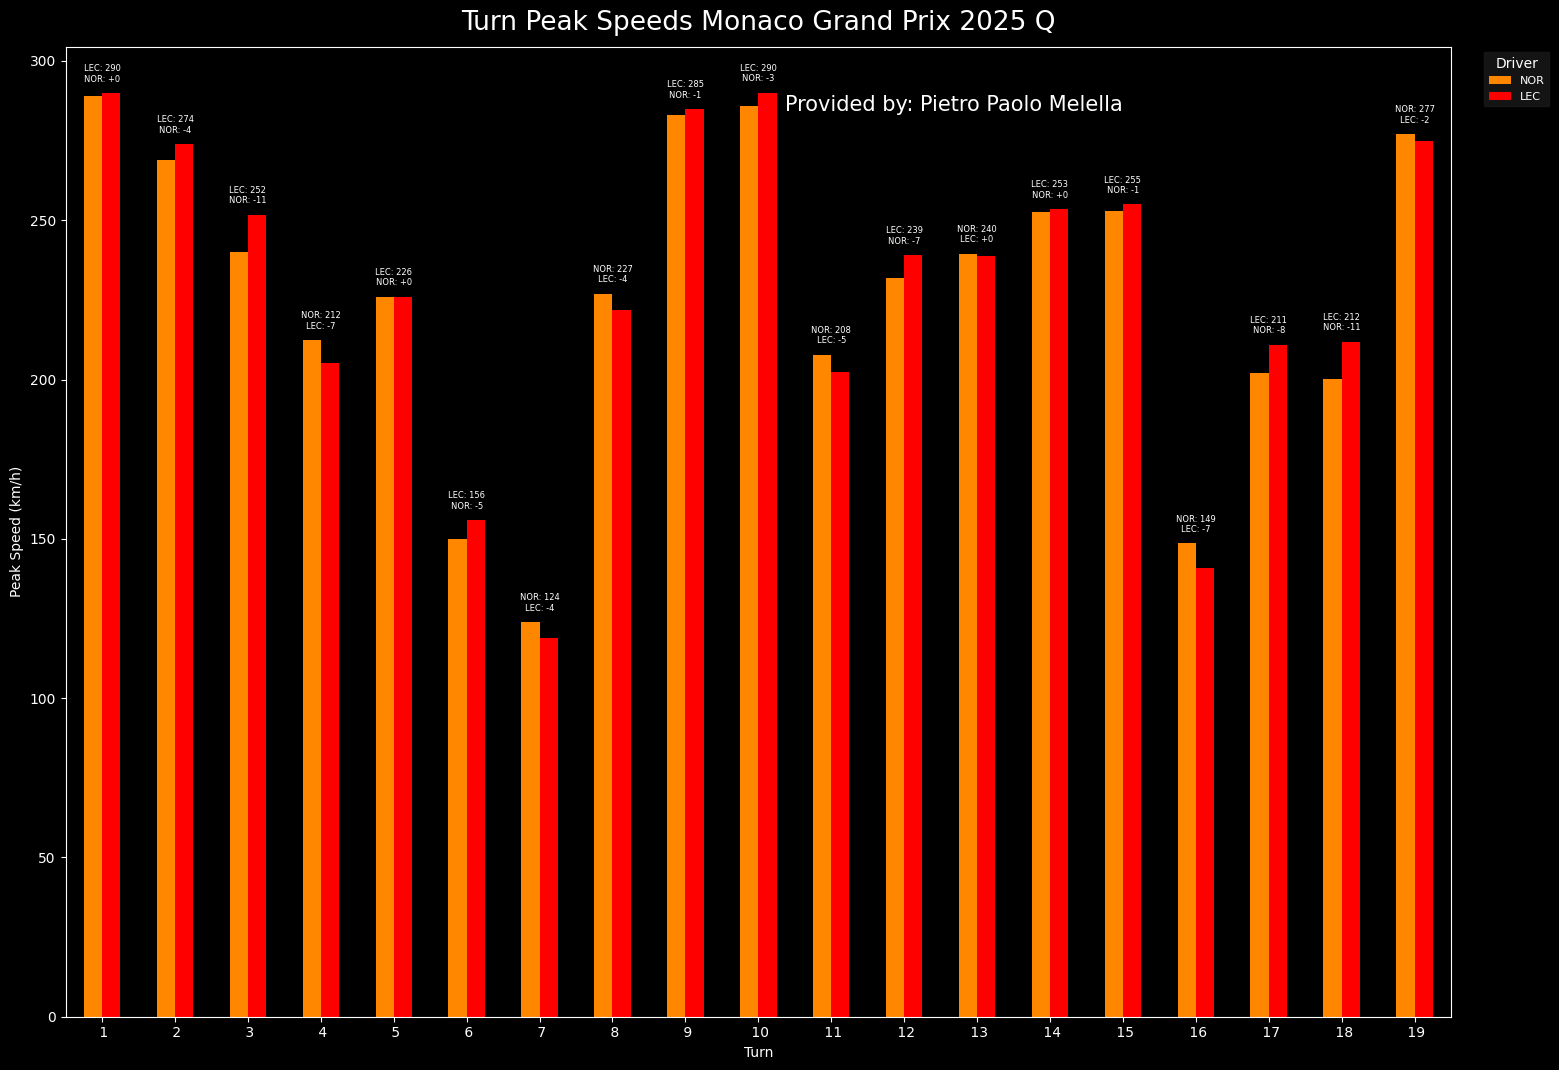

In [14]:
# define your team/driver colors if you like
colors = {'VER':'blue','NOR':'#ff8700','LEC':'#ff0000'}

comp = CornerSpeedComparator(
    drivers=['NOR','LEC'],
    driver_color_map=colors,
    session_label='Q'
)

# show absolute peaks
comp.plot_peak_speeds()

### 🏁 Fastest Driver per Corner

This visualization shows the percentage of corners where each driver was the fastest.  
It provides a clear picture of corner dominance and consistency across the lap.  
Higher shares suggest better grip, balance, or driver confidence in various track sectors.

In [15]:
class FastestTurnShare:
    """
    Compute and plot the percentage share of corners each driver was fastest.
    """
    def __init__(self, drivers, session, driver_color_map=None, n_interp=200, session_label=''):
        """
        :param drivers: list of driver codes, e.g. ['LEC','NOR','VER']
        :param session:    FastF1 session object (with .event info loaded)
        :param driver_color_map: dict mapping driver codes to colors
        :param n_interp:  number of interpolation points per corner
        """
        self.drivers = drivers
        self.session = session
        self.driver_color_map = driver_color_map or {}
        self.n_interp = n_interp
        self.session_label = session_label

        # load & prepare laps
        self._load_laps()
        # derive corner windows
        self._compute_corner_windows()
        # compute peak speeds per corner
        self._compute_peaks()
    
    def _load_laps(self):
        from fastf1 import utils  # ensure fastf1 is available
        self.laps = []
        for d in self.drivers:
            lap_obj = transformed_laps.pick_drivers(d).pick_fastest()
            fl = FastestLap(lap_obj)
            fl.df = compute_acceleration(fl.df)
            self.laps.append(fl)

    def _compute_corner_windows(self):
        apexes = sorted(circuit_info.corners['Distance'].values)
        # entry points are midpoints, start at 0
        self.entries = [0.0] + [(apexes[i-1] + apexes[i])/2 for i in range(1, len(apexes))]
        # exit points are midpoints, end at max distance
        self.exits   = [(apexes[i] + apexes[i+1])/2 for i in range(len(apexes)-1)] + \
                       [max(fl.df['Distance'].max() for fl in self.laps)]
        self.apexes = apexes

    def _compute_peaks(self):
        peak_dict = {}
        for idx, (start, apex, end) in enumerate(zip(self.entries, self.apexes, self.exits), start=1):
            grid = np.linspace(start, end, self.n_interp)
            speeds = {
                fl.name: np.interp(grid, fl.df['Distance'], fl.df['Speed'])
                for fl in self.laps
            }
            peaks = {name: sp.max() for name, sp in speeds.items()}
            peak_dict[f"Turn {idx}"] = peaks
        # DataFrame: index=Turn 1, Turn 2..., columns=drivers
        self.df_peaks = pd.DataFrame(peak_dict).T

    def plot_share(self, figsize=(6,6)):
        """
        Render a pie chart of percent share of corners won (fastest) by each driver.
        """
        # find per-turn winners
        winners = self.df_peaks.idxmax(axis=1)
        counts = winners.value_counts().reindex(self.drivers, fill_value=0)
        labels = counts.index.tolist()
        sizes  = counts.values.tolist()
        colors = [self.driver_color_map.get(d) for d in labels]

        fig, ax = plt.subplots(figsize=figsize)
        ax.pie(
            sizes,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=90
        )
        title = f"{self.session.event['EventName']} {self.session.event.year} {self.session_label}"
        ax.set_title(f"{title}\nFastest-Turn Share")

        # Annotate signature
        fig.text(
            0.9, 0.8,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )

        plt.tight_layout()
        plt.show()

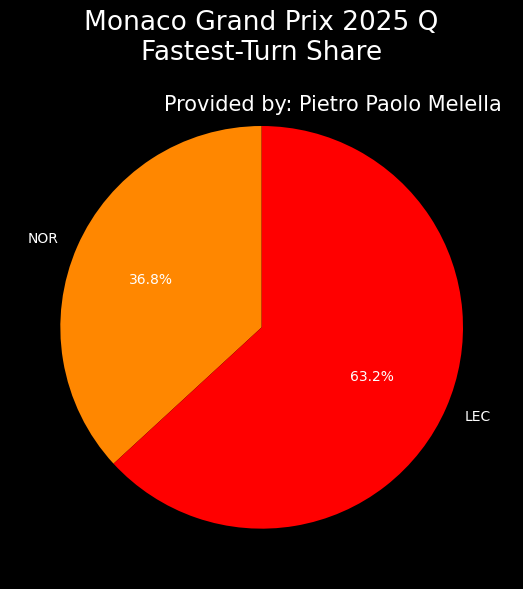

In [16]:
share = FastestTurnShare(
    drivers=['NOR','LEC'],
    session=session,
    driver_color_map=colors,
    session_label='Q'
)
share.plot_share()

In [20]:
from typing import Optional, List
from dataclasses import dataclass, field
import mplcursors

@dataclass
class TrackTelemetryVisualizer:
    """
    Enhanced interactive plot of a driver's fastest lap telemetry.

    Features:
      - Color by one channel (B→G→R or plasma)
      - Variable linewidth by a second channel (e.g. speed)
      - Corner annotations
      - Sector boundary markers
      - Brake/low-throttle highlights
      - Interactive tooltips via mplcursors
      - Auto-title and save() method
    """
    laps: any                                  # pre-filtered laps DataFrame
    circuit_info: any                          # session.get_circuit_info()
    driver: str                               # driver code
    color_channel: str = 'Throttle'           # channel for color
    width_channel: Optional[str] = 'Speed'    # channel for width, None to disable
    annotate_corners: bool = False            # show corner labels
    highlight_brake: bool = False             # mark throttle < threshold
    brake_threshold: float = 10.0             # throttle % threshold
    annotate_sectors: bool = False            # mark sector boundaries
    event_name: Optional[str] = None          # for title
    year: Optional[int] = None
    session_name: Optional[str] = None
    use_bgr_scale: bool = False

    # internal fields populated in __post_init__
    x: np.ndarray = field(init=False)
    y: np.ndarray = field(init=False)
    data_color: np.ndarray = field(init=False)
    data_width: np.ndarray = field(init=False)
    segments: np.ndarray = field(init=False)

    def __post_init__(self):
        # extract telemetry
        lap = self.laps.pick_drivers([self.driver]).pick_fastest()
        tel = lap.telemetry
        self.x = tel['X'].values
        self.y = tel['Y'].values
        self.data_color = tel[self.color_channel].values
        if self.width_channel:
            self.data_width = tel[self.width_channel].values
        else:
            self.data_width = np.full_like(self.data_color, fill_value=1.0)
        # build segments
        pts = np.vstack([self.x, self.y]).T.reshape(-1,1,2)
        self.segments = np.concatenate([pts[:-1], pts[1:]], axis=1)
        # store rotation angle
        self._angle = self.circuit_info.rotation / 180 * np.pi
        # store lap for sector annotations
        self._lap = lap

    @staticmethod
    def _rotate(xy: np.ndarray, *, angle: float) -> np.ndarray:
        mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
        return xy.dot(mat)

    def plot(self,
             track_color: str = '#888888',
             bg_linewidth: float = 14.0,
             data_linewidth: float = 4.0,
             figsize=(12,7),
             colorbar_orientation: str = 'vertical'):
        """
        Render the lap with:
          - grey outline (bg_linewidth)
          - B→G→R or plasma telemetry coloring
          - variable linewidth by width_channel
          - optional corner annotations
          - sector boundary markers
          - brake/low-throttle highlights
          - interactive tooltips
          - vertical colorbar with ticks at min/mid/max
          - automatic title if event_name/year/session_name provided
        """
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize, facecolor='#222222')
        ax.set_facecolor('#222222')
        ax.axis('off')

        # Rotate coordinates to circuit orientation
        coords = np.vstack([self.x, self.y]).T
        rot = self._rotate(coords, angle=self._angle)
        X, Y = rot[:,0], rot[:,1]
        pts = rot.reshape(-1,1,2)
        segs = np.concatenate([pts[:-1], pts[1:]], axis=1)

        # Draw track outline
        ax.plot(X, Y,
                color=track_color,
                linewidth=bg_linewidth,
                solid_capstyle='round',
                zorder=0)

        # Choose colormap
        cmap = (LinearSegmentedColormap.from_list('bgr',['blue','green','red'])
                if self.use_bgr_scale else mpl.cm.plasma)
        vmin, vmax = self.data_color.min(), self.data_color.max()
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

        # Compute variable linewidths safely
        if self.data_width.max() != self.data_width.min():
            widths = (
                0.5
                + 4 * (self.data_width - self.data_width.min())
                / (self.data_width.max() - self.data_width.min())
            )
        else:
            widths = np.full_like(self.data_color, 2.0)

        # Plot telemetry LineCollection
        lc = LineCollection(segs,
                            cmap=cmap,
                            norm=norm,
                            linewidth=widths,
                            capstyle='butt',
                            zorder=1)
        lc.set_array(self.data_color)
        ax.add_collection(lc)

        # Interactive tooltips
        cursor = mplcursors.cursor(lc, hover=True)
        @cursor.connect("add")
        def on_add(sel):
            idx = sel.target.index
            txt = f"{self.color_channel}: {self.data_color[idx]:.1f}"
            if self.width_channel:
                txt += f"\n{self.width_channel}: {self.data_width[idx]:.1f}"
            sel.annotation.set_text(txt)
            sel.annotation.get_bbox_patch().set(fc='white', alpha=0.8)

        # Highlight brake/low-throttle zones
        if self.highlight_brake:
            idxs = np.where(self.data_color < self.brake_threshold)[0]
            ax.scatter(rot[idxs,0], rot[idxs,1],
                       color='white', edgecolor='black',
                       s=30, zorder=2, label='Brake')

                        # Sector boundary markers (approximate by geometry)
        if self.annotate_sectors:
            # compute cumulative distance along the raw track
            coords_raw = np.vstack([self.x, self.y]).T
            deltas = np.linalg.norm(np.diff(coords_raw, axis=0), axis=1)
            cumdist = np.insert(np.cumsum(deltas), 0, 0)
            total = cumdist[-1]
            # place markers at 1/3 and 2/3 of lap distance
            for frac in (1/3, 2/3):
                target = total * frac
                i = np.argmin(np.abs(cumdist - target))
                # rotate and plot
                pt = coords_raw[i]
                rpt = self._rotate(pt.reshape(1,2), angle=self._angle)[0]
                ax.scatter(rpt[0], rpt[1], color='yellow', s=70, edgecolor='black', zorder=2)

        # Corner annotations
        if self.annotate_corners:
            offset = np.array([500, 0])
            for _, c in self.circuit_info.corners.iterrows():
                base = np.array([c['X'], c['Y']])
                offp = self._rotate(offset, angle=c['Angle']/180*np.pi)
                txtp = self._rotate(base+offp, angle=self._angle)
                bp   = self._rotate(base, angle=self._angle)
                ax.scatter(txtp[0], txtp[1],
                           color='white', s=150,
                           edgecolor='grey', linewidth=1.5, zorder=2)
                ax.plot([bp[0],txtp[0]], [bp[1],txtp[1]],
                        color='grey', linewidth=1.0, zorder=1)
                ax.text(txtp[0], txtp[1], f"{c['Number']}{c['Letter']}",
                        ha='center', va='center', color='black', fontsize=9, zorder=3)

        # Colorbar with ticks at min/mid/max
        cbar = fig.colorbar(lc, ax=ax,
                            orientation=colorbar_orientation,
                            pad=0.02, shrink=0.6)
        mid = 0.5*(vmin+vmax)
        cbar.set_ticks([vmin, mid, vmax])
        cbar.set_ticklabels([f"{vmin:.0f}", f"{mid:.0f}", f"{vmax:.0f}"])
        cbar.ax.yaxis.set_tick_params(labelsize=10, color='white')
        plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
        cbar.set_label(self.color_channel,
                       labelpad=10, fontsize=12, color='white')

        # Automatic title
        if self.event_name and self.year and self.session_name:
            full = f"{self.event_name} {self.year} {self.session_name}, {self.driver} — {self.color_channel}"
            ax.set_title(full, fontsize=16, color='white', pad=20)
            
        # Annotate signature
        fig.text(
            0.92, 0.87,
            "Provided by: Pietro Paolo Melella",
            ha='right', va='bottom',
            color='white', fontsize=15
        )

        plt.show()


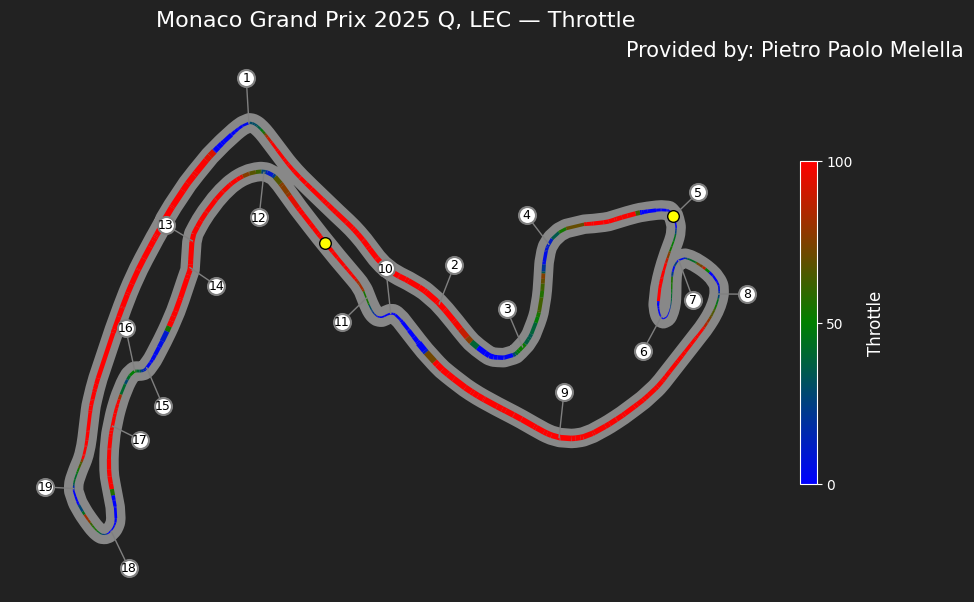

In [23]:
vis1 = TrackTelemetryVisualizer(
    laps=laps,
    circuit_info=circuit_info,
    driver='LEC',
    color_channel='Throttle',
    width_channel='Speed',
    annotate_corners=True,
    highlight_brake=False,      # ← disable the white‐dot brake markers
    annotate_sectors=True,     # leave sector markers off
    event_name='Monaco Grand Prix',
    year=2025,
    session_name='Q',
    use_bgr_scale=True
)
vis1.plot()

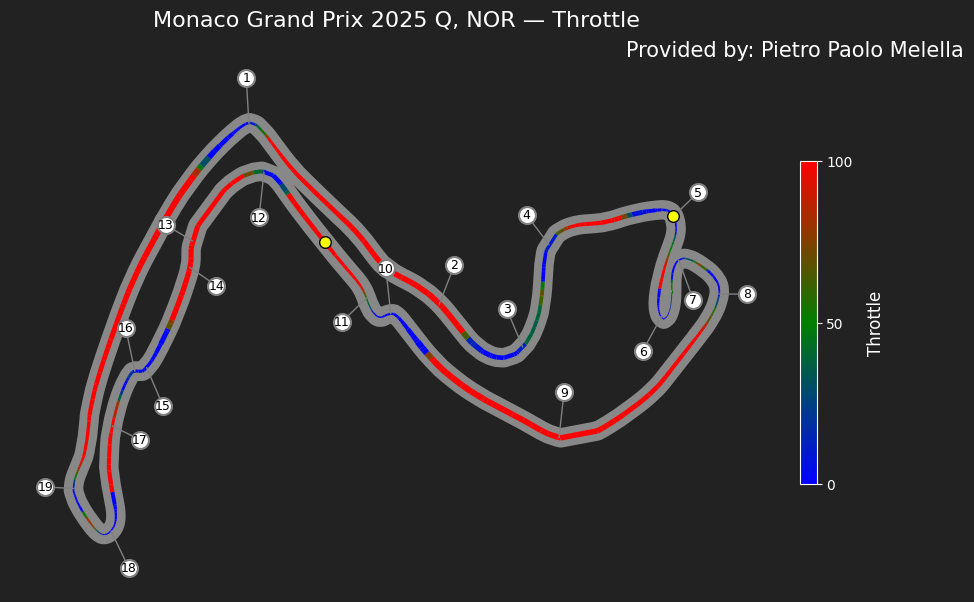

In [26]:
vis2 = TrackTelemetryVisualizer(
    laps=laps,
    circuit_info=circuit_info,
    driver='NOR',
    color_channel='Throttle',
    width_channel='Speed',
    annotate_corners=True,
    highlight_brake=False,      # ← disable the white‐dot brake markers
    annotate_sectors=True,     # leave sector markers off
    event_name='Monaco Grand Prix',
    year=2025,
    session_name='Q',
    use_bgr_scale=True
)
vis2.plot()

In [27]:
# Create the GIF
from PIL import Image

img1 = Image.open("lec.png")
img2 = Image.open("nor.png")

img1 = img1.resize(img2.size)

img1.save(
    "comparison.gif",
    save_all=True,
    append_images=[img2, img1],
    duration=800,  # ms per frame
    loop=0
)

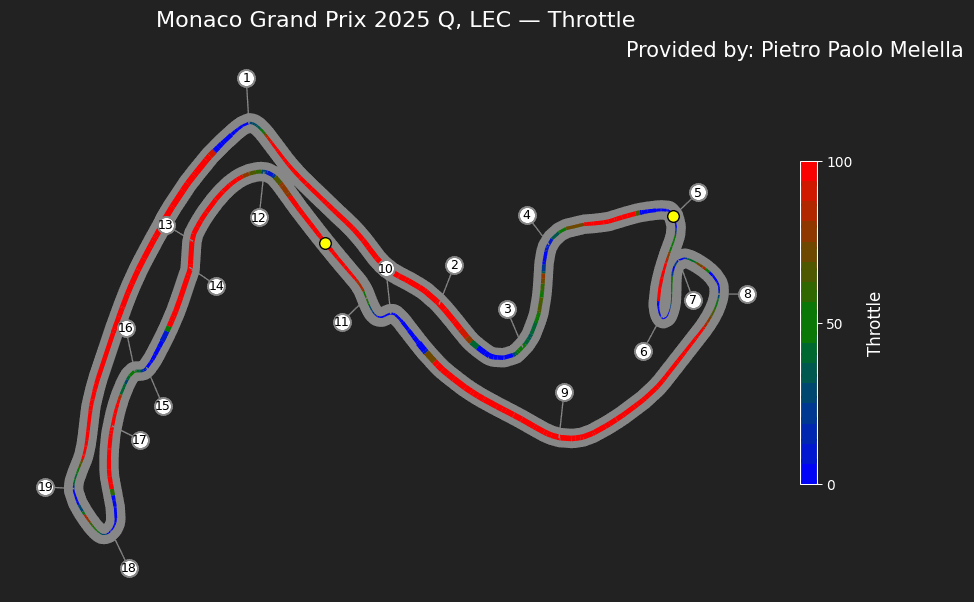

In [28]:
# Display the GIF
from IPython.display import Image as IPyImage
IPyImage(filename="comparison.gif")